In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
x = pd.read_csv('./letter-recognition.data',header=None)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


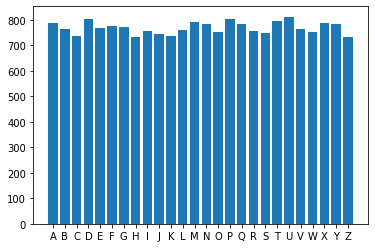

In [3]:
letter = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
Letter_Sum = []
for i in letter:
    Letter_Sum.append(x[x[0]==i].shape[0])
plt.bar(letter, Letter_Sum)
plt.show()

In [4]:
j=0
for i in letter:
    x.replace(i,j,inplace=True)
    j+=1
x_class = x.iloc[:,:1]
x_train = x.iloc[:,1:]
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
x_tain,x_test,\
class_train,class_test,= train_test_split(x_train, x_class,test_size=0.1,random_state=30)

<Figure size 1152x864 with 0 Axes>

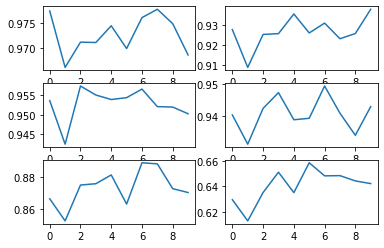

In [6]:
svm=SVC()
mlp=MLPClassifier()
knn=KNeighborsClassifier()
forest=RandomForestClassifier()
tree=DecisionTreeClassifier()
gass=GaussianNB()
svm_scores = cross_val_score(svm,x_tain,class_train,cv=10,scoring='accuracy')
mlp_scores = cross_val_score(mlp,x_tain,class_train,cv=10,scoring='accuracy')
knn_scores = cross_val_score(knn,x_tain,class_train,cv=10,scoring='accuracy')
forest_scores = cross_val_score(forest,x_tain,class_train,cv=10,scoring='accuracy')
tree_scores = cross_val_score(tree,x_tain,class_train,cv=10,scoring='accuracy')
gass_scores = cross_val_score(gass,x_tain,class_train,cv=10,scoring='accuracy')
plt.figure(figsize=(16, 12))
f, ax = plt.subplots(3,2)
ax[0][0].plot(svm_scores)
ax[0][1].plot(mlp_scores)
ax[1][0].plot(knn_scores)
ax[1][1].plot(forest_scores)
ax[2][0].plot(tree_scores)
ax[2][1].plot(gass_scores)
plt.show()

In [7]:
svm=SVC().fit(x_tain,class_train)
Data_target_pred=svm.predict(x_test)
print('准确率为：',accuracy_score(class_test,Data_target_pred))

准确率为： 0.978


In [8]:
print(metrics.classification_report(class_test,Data_target_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       0.96      0.96      0.96        85
           2       0.99      0.97      0.98        77
           3       0.94      0.99      0.96        74
           4       0.97      0.97      0.97        74
           5       0.95      0.93      0.94        76
           6       0.99      0.97      0.98        72
           7       0.95      0.95      0.95        76
           8       1.00      0.97      0.99        75
           9       0.97      1.00      0.99        74
          10       0.99      0.96      0.97        71
          11       1.00      0.97      0.98        90
          12       1.00      1.00      1.00        82
          13       1.00      0.97      0.98        89
          14       0.98      0.94      0.96        68
          15       0.97      0.96      0.96        70
          16       0.99      0.99      0.99        75
          17       0.91    

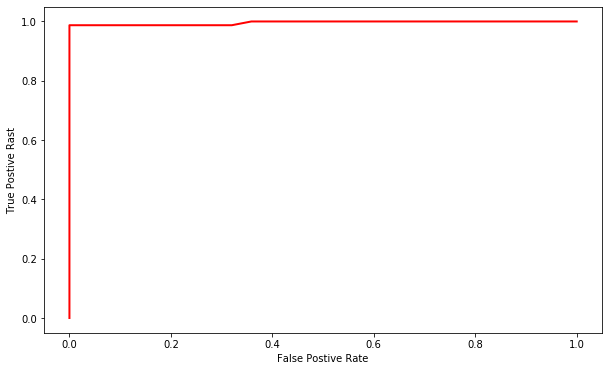

In [9]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds= roc_curve(class_test,Data_target_pred,pos_label=25)
plt.figure(figsize=(10,6))
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rast')
plt.plot(fpr,tpr,linewidth=2,linestyle="-",color='r')
plt.show()